# Tugas Kecil 1
## Eksplorasi library Decision Tree Learning pada Jupyter Notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modul six untuk Id3Estimator
import six, sys
sys.modules['sklearn.externals.six'] = six

# Modul-modul pengolahan data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Modul model algoritma machine learning
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import graphviz

# Modul pengecekan akurasi
from sklearn.metrics import accuracy_score, f1_score

### Load dataset

In [4]:
# Dataset breast cancer
breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(breast_cancer.data, 
                                columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target

df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Dataset play tennis
df_play_tennis = pd.read_csv('/content/drive/MyDrive/PlayTennis.csv')

# Melakukan encoding pada data-data kategorial
le = LabelEncoder()

df_play_tennis['Outlook'] = le.fit_transform(df_play_tennis['Outlook'])
df_play_tennis['Temperature'] = le.fit_transform(df_play_tennis['Temperature'])
df_play_tennis['Humidity'] = le.fit_transform(df_play_tennis['Humidity'])
df_play_tennis['Wind'] = le.fit_transform(df_play_tennis['Wind'])
df_play_tennis['Play Tennis'] = le.fit_transform(df_play_tennis['Play Tennis'])

df_play_tennis.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [6]:
X_breast_cancer = df_breast_cancer[breast_cancer.feature_names]
y_breast_cancer = df_breast_cancer['target']

In [7]:
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(
    X_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42)

In [8]:
X_play_tennis = df_play_tennis[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y_play_tennis = df_play_tennis['Play Tennis']

In [9]:
X_pt_train, X_pt_test, y_pt_train, y_pt_test = train_test_split(
    X_play_tennis, y_play_tennis, test_size=0.2, random_state=42)

### Decision Tree Classifier

#### 1. Dataset Breast Cancer

In [10]:
bc_decision_tree = DecisionTreeClassifier(random_state=42)
bc_decision_tree = bc_decision_tree.fit(X_bc_train, y_bc_train)

res = export_text(bc_decision_tree, feature_names=breast_cancer['feature_names'].tolist())
print(res)

|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |--- worst texture <= 27.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  27.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |--- worst texture <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  33.35
|   |   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- area error >  48.70
|   |   |   |--- concavity error <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- concavity error >  0.02
|   |   |   |   |--- class: 1
|   |--- worst radius >  16.

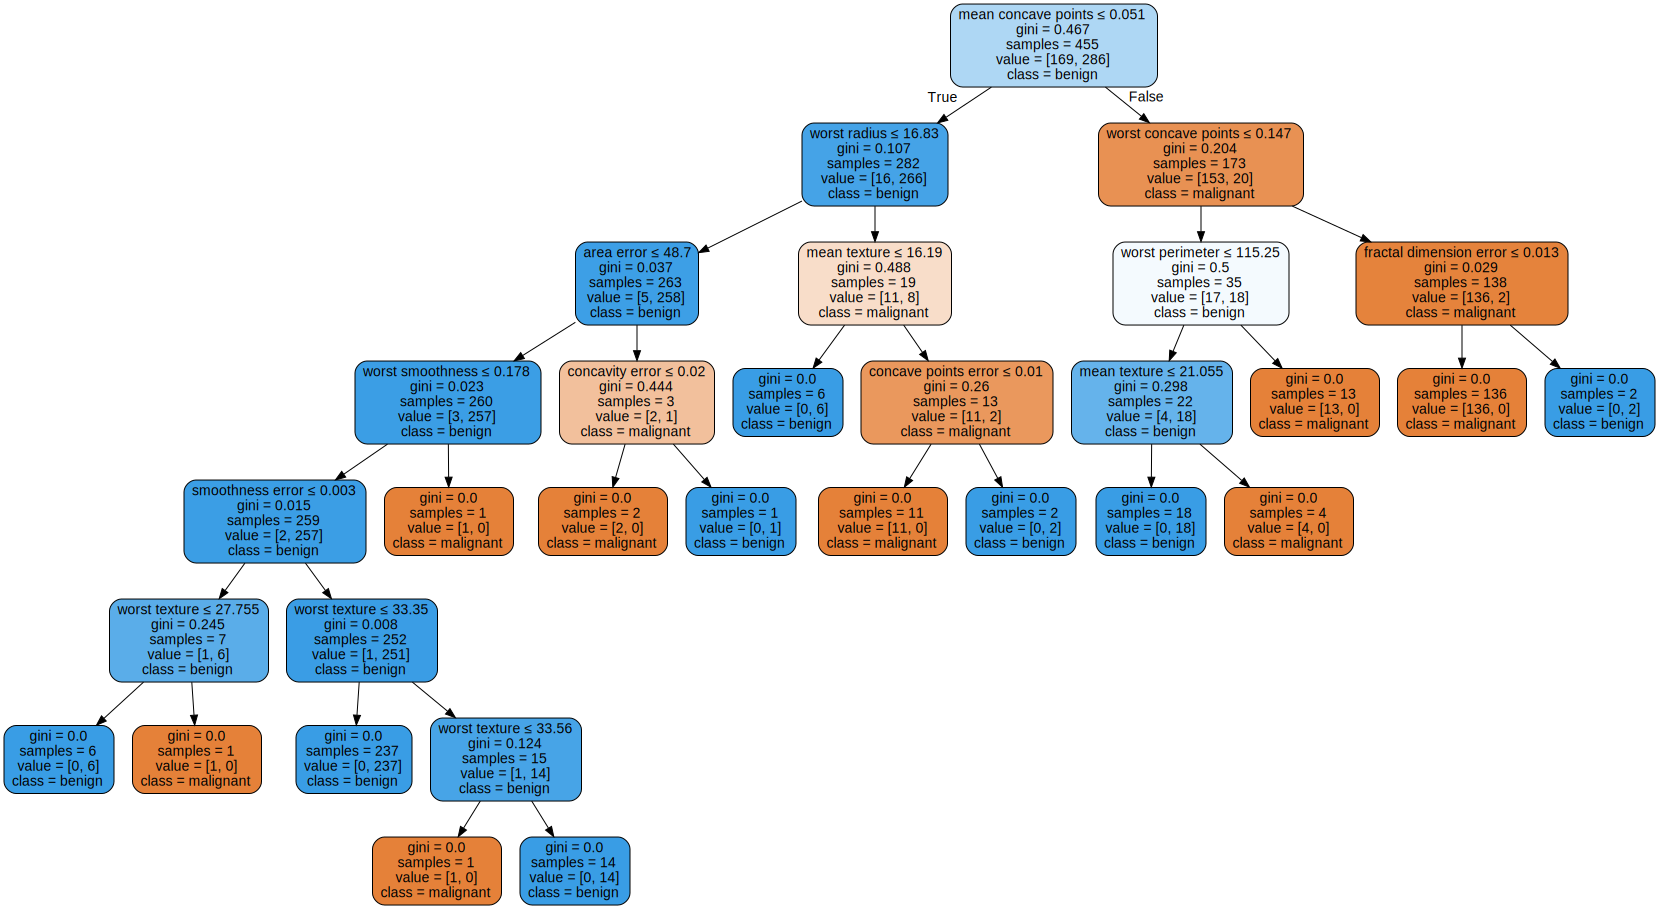

In [11]:
# visualisasi tree
dot_data = export_graphviz(bc_decision_tree, out_file=None,
                           feature_names=breast_cancer.feature_names,
                           class_names=breast_cancer.target_names,
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [12]:
# Memprediksi hasil dari model
y_bc_pred = bc_decision_tree.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_bc_test, y_bc_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_bc_test, y_bc_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.9473684210526315
Evaluasi hasil prediksi menggunakan metric F1: 0.9577464788732394


#### 2. Dataset Play Tennis

In [13]:
pt_decision_tree = DecisionTreeClassifier(random_state=42)
pt_decision_tree.fit(X_pt_train, y_pt_train)

res = export_text(pt_decision_tree, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(res)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 0
|   |   |--- Wind >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



In [14]:
# Memprediksi hasil dari model
y_pt_pred = pt_decision_tree.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_pt_test, y_pt_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_pt_test, y_pt_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 1.0
Evaluasi hasil prediksi menggunakan metric F1: 1.0


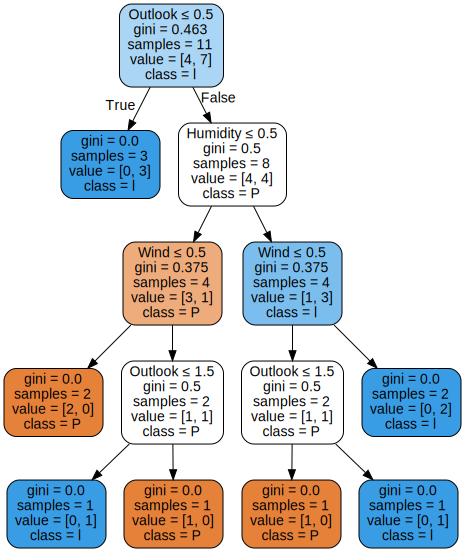

In [15]:
# visualisasi tree
dot_data = export_graphviz(pt_decision_tree, out_file=None,
                           feature_names=df_play_tennis.columns.tolist()[:-1],
                           class_names=df_play_tennis.columns.tolist()[-1],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Id3Estimator

In [16]:
from id3 import export_text, export_graphviz

#### 1. Dataset Breast Cancer

In [17]:
bc_estimator = Id3Estimator()
bc_estimator = bc_estimator.fit(X_bc_train, y_bc_train)

res = export_text(bc_estimator.tree_, feature_names=breast_cancer['feature_names'].tolist())
print(res)


mean concave points <=0.05
|   worst radius <=16.83
|   |   radius error <=0.63
|   |   |   worst texture <=30.15: 1 (225) 
|   |   |   worst texture >30.15
|   |   |   |   worst area <=641.60: 1 (25) 
|   |   |   |   worst area >641.60
|   |   |   |   |   mean radius <=13.45
|   |   |   |   |   |   mean texture <=28.79: 0 (3) 
|   |   |   |   |   |   mean texture >28.79: 1 (1) 
|   |   |   |   |   mean radius >13.45: 1 (6) 
|   |   radius error >0.63
|   |   |   mean smoothness <=0.09: 1 (1) 
|   |   |   mean smoothness >0.09: 0 (2) 
|   worst radius >16.83
|   |   mean texture <=16.19: 1 (6) 
|   |   mean texture >16.19
|   |   |   concave points error <=0.01: 0 (11) 
|   |   |   concave points error >0.01: 1 (2) 
mean concave points >0.05
|   worst perimeter <=114.45
|   |   worst texture <=25.65
|   |   |   worst concave points <=0.17: 1 (19) 
|   |   |   worst concave points >0.17: 0 (2) 
|   |   worst texture >25.65
|   |   |   perimeter error <=1.56
|   |   |   |   mean radius 

In [18]:
# Memprediksi hasil dari model
y_bc_pred = bc_estimator.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_bc_test, y_bc_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_bc_test, y_bc_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.9385964912280702
Evaluasi hasil prediksi menggunakan metric F1: 0.9517241379310345


#### 2. Dataset Play Tennis

In [19]:
pt_estimator = Id3Estimator()
pt_estimator.fit(X_pt_train, y_pt_train)

res = export_text(pt_estimator.tree_, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(res)


Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Humidity <=0.50
|   |   Wind <=0.50: 0 (2) 
|   |   Wind >0.50: 0 (1/1) 
|   Humidity >0.50
|   |   Wind <=0.50
|   |   |   Temperature <=1.00: 0 (1) 
|   |   |   Temperature >1.00: 1 (1) 
|   |   Wind >0.50: 1 (2) 



In [20]:
# Memprediksi hasil dari model
y_pt_pred = pt_estimator.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_pt_test, y_pt_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_pt_test, y_pt_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 1.0
Evaluasi hasil prediksi menggunakan metric F1: 1.0


### K Means

#### 1. Dataset Breast Cancer

In [21]:
bc_kmeans = KMeans(n_clusters=2, random_state=42)
bc_kmeans.fit(X_bc_train)

KMeans(n_clusters=2, random_state=42)

In [22]:
bc_kmeans.cluster_centers_

array([[1.25855042e+01, 1.85612676e+01, 8.13569577e+01, 4.98667042e+02,
        9.43091549e-02, 9.20322817e-02, 6.46656789e-02, 3.38423972e-02,
        1.78194930e-01, 6.35234366e-02, 3.06044507e-01, 1.19986761e+00,
        2.18847690e+00, 2.41235803e+01, 7.09819437e-03, 2.41763437e-02,
        3.02242842e-02, 1.08719014e-02, 2.06208394e-02, 3.82007972e-03,
        1.40930479e+01, 2.46787606e+01, 9.24600563e+01, 6.24786197e+02,
        1.29178535e-01, 2.27340732e-01, 2.27010504e-01, 9.27702563e-02,
        2.84487887e-01, 8.36058592e-02],
       [1.95567000e+01, 2.13994000e+01, 1.29247000e+02, 1.20715000e+03,
        1.00837800e-01, 1.44753300e-01, 1.74923400e-01, 9.95329000e-02,
        1.91407000e-01, 6.00351000e-02, 7.42714000e-01, 1.21269500e+00,
        5.23596000e+00, 9.66857000e+01, 6.60170000e-03, 3.08152700e-02,
        4.20515000e-02, 1.55221800e-02, 2.04055000e-02, 3.82179000e-03,
        2.38394000e+01, 2.85778000e+01, 1.59086000e+02, 1.77230000e+03,
        1.39887400e-01,

In [23]:
# Memprediksi hasil dari model
y_bc_pred = bc_kmeans.predict(X_bc_test)
y_bc_pred

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_bc_test, y_bc_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_bc_test, y_bc_pred, average='micro')))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.12280701754385964
Evaluasi hasil prediksi menggunakan metric F1: 0.12280701754385964


#### 2. Dataset Play Tennis

In [24]:
pt_kmeans = KMeans(n_clusters=2, random_state=42)
pt_kmeans.fit(X_pt_train)

KMeans(n_clusters=2, random_state=42)

In [25]:
pt_kmeans.cluster_centers_

array([[0.66666667, 0.33333333, 0.83333333, 0.66666667],
       [1.6       , 1.8       , 0.2       , 0.4       ]])

In [26]:
# # Memprediksi hasil dari model
y_pt_pred = pt_kmeans.predict(X_pt_test)

# # Mengevaluasi hasil prediksi
# # Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_pt_test, y_pt_pred)))

# # Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_pt_test, y_pt_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.6666666666666666
Evaluasi hasil prediksi menggunakan metric F1: 0.8


### LogisticRegression

#### 1. Dataset Breast Cancer

In [27]:
bc_log_regression = LogisticRegression(random_state=42, max_iter=10000)
bc_log_regression.fit(X_bc_train, y_bc_train)

LogisticRegression(max_iter=10000, random_state=42)

In [28]:
bc_log_regression.coef_

array([[ 1.02450262,  0.22240761, -0.3580103 ,  0.02505808, -0.15609899,
        -0.23525959, -0.53022899, -0.28428195, -0.22489974, -0.03568163,
        -0.09301441,  1.43232745, -0.14616717, -0.09063846, -0.02244006,
         0.04933583, -0.04026561, -0.03229285, -0.03320774,  0.01194907,
         0.13731236, -0.51119554, -0.01934061, -0.01663556, -0.30851387,
        -0.7713297 , -1.42851677, -0.51260694, -0.74245155, -0.09972466]])

In [29]:
# Memprediksi hasil dari model
y_bc_pred = bc_log_regression.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_bc_test, y_bc_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_bc_test, y_bc_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.956140350877193
Evaluasi hasil prediksi menggunakan metric F1: 0.9655172413793103


#### 2. Dataset Play Tennis

In [30]:
pt_log_regression = LogisticRegression(random_state=42, max_iter=10000)
pt_log_regression.fit(X_pt_train, y_pt_train)

LogisticRegression(max_iter=10000, random_state=42)

In [31]:
pt_log_regression.coef_

array([[-0.58244786, -0.0987447 ,  0.68889197,  0.72642571]])

In [32]:
# Memprediksi hasil dari model
y_pt_pred = pt_log_regression.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_pt_test, y_pt_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_pt_test, y_pt_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.6666666666666666
Evaluasi hasil prediksi menggunakan metric F1: 0.8


### Neural Network

#### 1. Dataset Breast Cancer

In [33]:
bc_neural_network = MLPClassifier(random_state=42)
bc_neural_network.fit(X_bc_train, y_bc_train)

MLPClassifier(random_state=42)

In [34]:
bc_neural_network.coefs_

[array([[-6.91807926e-02,  2.15670985e-01,  7.45095830e-04, ...,
          1.57259002e-08, -2.26490378e-01, -1.91674421e-01],
        [-2.19908656e-01,  6.13319163e-02, -1.65912634e-04, ...,
          1.15236141e-02,  1.63183654e-01,  1.15947144e-01],
        [ 4.86235414e-02, -1.59413714e-01, -5.72546345e-03, ...,
         -2.39768515e-03,  3.29609649e-02, -1.98728835e-01],
        ...,
        [ 7.04438586e-02,  1.66873893e-01, -9.00689687e-03, ...,
          4.52405314e-06,  2.45289617e-01, -9.56875167e-02],
        [ 1.36355615e-01,  1.83951499e-01,  1.77956502e-02, ...,
         -4.94895511e-04, -4.12245164e-02, -2.08699319e-01],
        [-1.64611978e-01,  1.22862483e-01, -2.72529905e-02, ...,
         -1.97821579e-04, -9.93881880e-02,  1.49407893e-01]]),
 array([[-1.97529919e-01],
        [ 1.21968255e-01],
        [ 2.20200238e-02],
        [ 1.80909862e-08],
        [-1.03530816e-01],
        [-1.97852353e-02],
        [ 1.26926502e-03],
        [-2.14434159e-01],
        [ 4.9

In [35]:
y_bc_pred = bc_neural_network.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_bc_test, y_bc_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_bc_test, y_bc_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.9385964912280702
Evaluasi hasil prediksi menggunakan metric F1: 0.953020134228188


#### 2. Dataset Play Tennis

In [36]:
pt_neural_network = MLPClassifier(random_state=42, max_iter=1000)
pt_neural_network.fit(X_pt_train, y_pt_train)

MLPClassifier(max_iter=1000, random_state=42)

In [37]:
pt_neural_network.coefs_

[array([[ 5.75334379e-17,  5.90697603e-01,  2.67202836e-01,
         -1.29043159e-01, -2.07771426e-01, -1.77061850e-01,
         -1.48690806e-04,  2.34289944e-01, -1.93160016e-01,
         -7.04264650e-15, -3.99567663e-04,  5.21356283e-01,
          1.20291902e-02, -4.37271166e-01, -2.01983672e-01,
          5.95649865e-02, -1.27151405e-01, -1.09360520e-01,
         -3.19127421e-01, -5.13289954e-02, -1.62930283e-01,
         -3.23544440e-01, -1.37338339e-15, -2.11685750e-16,
          1.05777170e-17,  3.02387432e-01, -3.77730648e-01,
          1.95441450e-01, -2.14399635e-02, -2.07030597e-04,
          3.98000493e-02, -2.83476197e-01, -4.38359972e-01,
          1.32552261e-01,  2.28403075e-01,  1.53386366e-01,
         -2.51271360e-14,  5.09682356e-02,  6.55185678e-01,
         -6.13921486e-02, -3.80058926e-01, -1.87800222e-01,
         -2.84856518e-04,  3.21798650e-01, -3.15818137e-01,
          5.69688350e-02,  7.26369947e-02,  8.32320539e-02,
          8.77237292e-02, -2.40718128e-0

In [38]:
# Memprediksi hasil dari model
y_pt_pred = pt_neural_network.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_pt_test, y_pt_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_pt_test, y_pt_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 1.0
Evaluasi hasil prediksi menggunakan metric F1: 1.0


### SVM

#### 1. Dataset Breast Cancer

In [39]:
bc_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
bc_svm.fit(X_bc_train, y_bc_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [40]:
bc_svm.named_steps['svc'].dual_coef_

array([[-0.14351766, -1.        , -1.        , -0.36744822, -1.        ,
        -1.        , -0.49680947, -1.        , -0.92543086, -0.5634964 ,
        -0.18862423, -0.36761666, -1.        , -0.3573522 , -0.14472207,
        -1.        , -0.60469529, -1.        , -1.        , -0.04314932,
        -1.        , -1.        , -1.        , -1.        , -0.6699591 ,
        -0.2172382 , -0.67468591, -0.14012133, -1.        , -1.        ,
        -0.21337712, -0.6679511 , -0.68968737, -0.65335124, -1.        ,
        -1.        , -0.83077391, -1.        , -1.        , -0.49936283,
        -1.        , -1.        , -0.1257606 , -0.69861268, -0.69378714,
        -0.68027369, -0.32979043, -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ,  1.        ,  0.8243754 ,
         0.13150678,  1.        ,  1.        ,  0.89816219,  1.        ,
         0.01195675,  0.84851895,  0.76204143,  1.        ,  1.        ,
         0.54981954,  1.        ,  0.46726034,  1. 

In [41]:
y_bc_pred = bc_svm.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_bc_test, y_bc_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_bc_test, y_bc_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.9824561403508771
Evaluasi hasil prediksi menggunakan metric F1: 0.9861111111111112


#### 2. Dataset Play Tennis

In [42]:
pt_svc = SVC(random_state=42)
pt_svc.fit(X_pt_train, y_pt_train)

SVC(random_state=42)

In [43]:
pt_svc.dual_coef_

array([[-1.        , -1.        , -1.        , -1.        ,  0.68467388,
         0.19922452,  0.30277042,  1.        ,  1.        ,  0.81333118]])

In [44]:
# Memprediksi hasil dari model
y_pt_pred = pt_svc.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(accuracy_score(y_pt_test, y_pt_pred)))

# Menggunakan metric F1
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(f1_score(y_pt_test, y_pt_pred)))

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.6666666666666666
Evaluasi hasil prediksi menggunakan metric F1: 0.8


Made by: 
- 13519107 Daffa Ananda Pratama Resyaly 
(4,5,6 breast cancer dataset & 1,2,3 play tennis dataset)
- 13519113 Raihan Astrada Fathurrahman 
(1,2,3 breast cancer dataset  & 4,5,6 play tennis dataset)